# TIME SERIES FORECASTING ON BITFINEX CRYPTO COINS EXCHANGE RATE

In [258]:
# Fetching the near real-time data from the Nasdaq API 
!pip install nasdaq-data-link
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = 'b3XwSPRWppWQVjfQirm1'
data = nasdaqdatalink.get_table('QDL/BITFINEX', code='ZRXUSD')

# Data Description

In [260]:
import pandas as pd
data['date']= pd.to_datetime(data['date'])
data.set_index(data['date'], inplace=True)
data.head(10)

,code,date,high,low,mid,last,bid,ask,volume
date,,,,,,,,,
2024-04-16,ZRXUSD,2024-04-16,0.49566,0.45885,0.493965,0.49407,0.49384,0.49409,363610.030098
2024-04-15,ZRXUSD,2024-04-15,0.52940,0.46704,0.485765,0.48394,0.48557,0.48596,569165.846722
2024-04-14,ZRXUSD,2024-04-14,0.50420,0.44582,0.503740,0.50420,0.50340,0.50408,914965.318772
2024-04-13,ZRXUSD,2024-04-13,0.54841,0.40873,0.461690,0.46196,0.46150,0.46188,765634.012187
2024-04-12,ZRXUSD,2024-04-12,0.64836,0.49444,0.535945,0.53398,0.53586,0.53603,856430.342399
2024-04-10,ZRXUSD,2024-04-10,0.68880,0.63204,0.665575,0.66640,0.66555,0.66560,125104.521327
2024-04-09,ZRXUSD,2024-04-09,0.76000,0.67662,0.689720,0.68777,0.68928,0.69016,468186.444439
2024-04-07,ZRXUSD,2024-04-07,0.70554,0.66256,0.686875,0.68646,0.68665,0.68710,64480.177151
2024-04-06,ZRXUSD,2024-04-06,0.66622,0.64834,0.665910,0.66544,0.66567,0.66615,48123.633309


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2056 entries, 2024-04-16 to 2018-07-05
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   code    2056 non-null   object        
 1   date    2056 non-null   datetime64[ns]
 2   high    2056 non-null   float64       
 3   low     2056 non-null   float64       
 4   mid     2056 non-null   float64       
 5   last    2056 non-null   float64       
 6   bid     2056 non-null   float64       
 7   ask     2056 non-null   float64       
 8   volume  2056 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 160.6+ KB


In [133]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

<AxesSubplot:xlabel='date'>

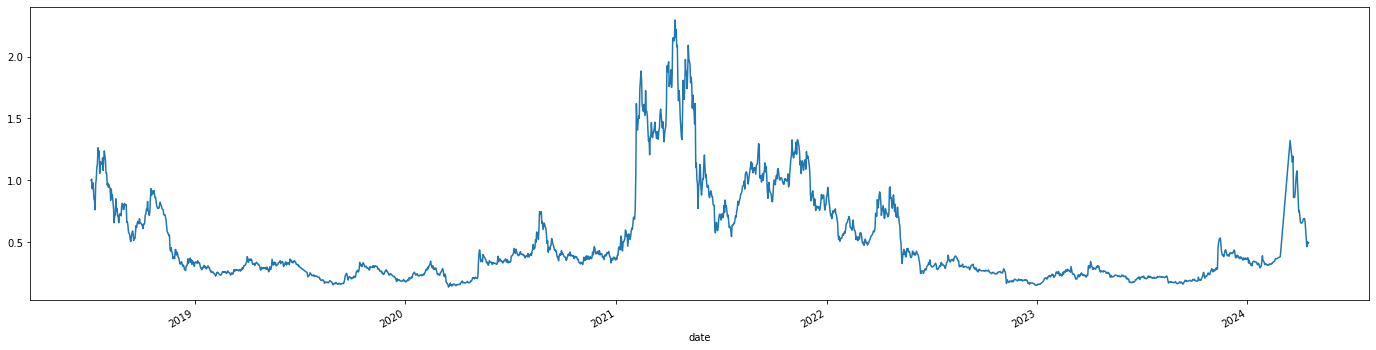

In [134]:
data['ask'].plot(figsize=(24,6))

<Figure size 432x288 with 0 Axes>

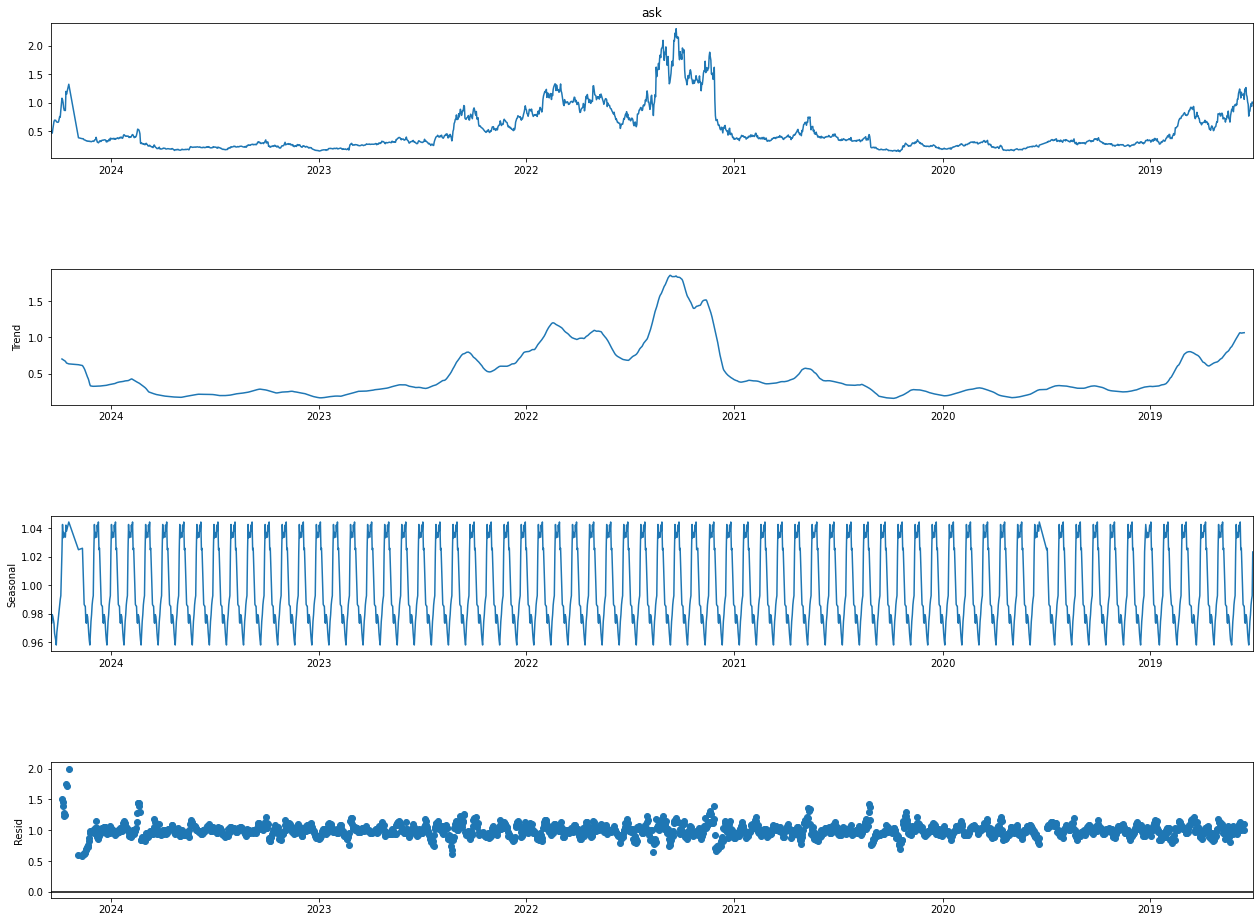

In [135]:
decomposition = seasonal_decompose(data['ask'], model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 15)

# Checks for Stationarity

In [139]:
print("ADF Test:")
adf_test = adfuller(data['ask'], autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if (adf_test[1] < 0.05):
    print('Stationary')
else:
    print('Not Stationary')

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -2.126856
p-value: 0.233854
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Not Stationary


In [140]:
print("KPSS Test:")
kpss_test = kpss(data['ask'], regression='c', nlags=None, store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))
if (kpss_test[1] < 0.05):
    print('Not Stationary')
else:
    print('Stationary')

KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.751952
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Not Stationary


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

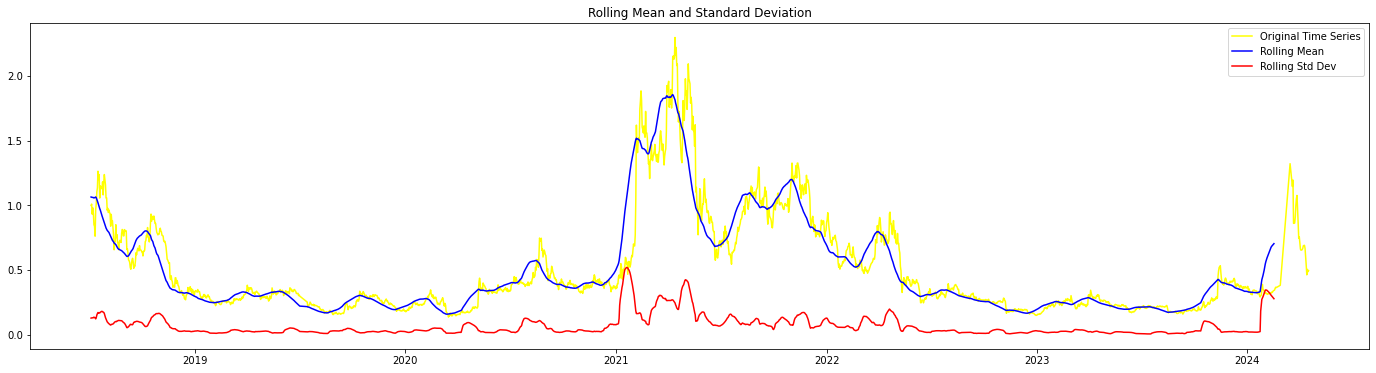

In [235]:
rolling_mean = data['ask'].rolling(30).mean()
rolling_std_dev = data['ask'].rolling(30).std()

plt.figure(figsize=(24,6))
plt.plot(data['ask'], color='yellow',label='Original Time Series')
plt.plot(rolling_mean, color='blue', label='Rolling Mean')
plt.plot(rolling_std_dev, color='red', label = 'Rolling Std Dev')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
    

In [236]:
data_differenced = data['ask'].diff()
data_differenced = data_differenced.loc[data_differenced.notnull()]

In [237]:
print("ADF Test:")
adf_test = adfuller(data_differenced, autolag='AIC')
print('Null Hypothesis: Not Stationary')
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))
if (adf_test[1] < 0.05):
    print('Stationary')
else:
    print('Not Stationary')

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -8.719122
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


In [238]:
print("KPSS Test:")
kpss_test = kpss(data_differenced, regression='c', nlags=None, store=False)
print('Null Hypothesis: Stationary')
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))
if (kpss_test[1] < 0.05):
    print('Not Stationary')
else:
    print('Stationary')

KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.058737
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Stationary


C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

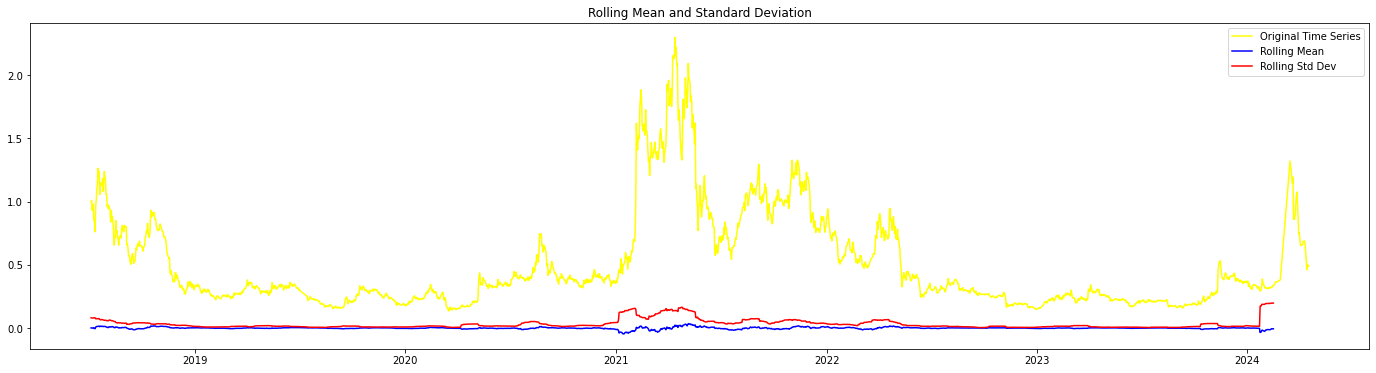

In [239]:
rolling_mean = data_differenced.rolling(30).mean()
rolling_std_dev = data_differenced.rolling(30).std()

plt.figure(figsize=(24,6))
plt.plot(data['ask'], color='yellow',label='Original Time Series')
plt.plot(rolling_mean, color='blue', label='Rolling Mean')
plt.plot(rolling_std_dev, color='red', label = 'Rolling Std Dev')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')

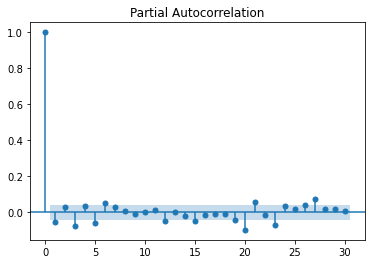

In [240]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data_differenced.dropna(), lags=30)

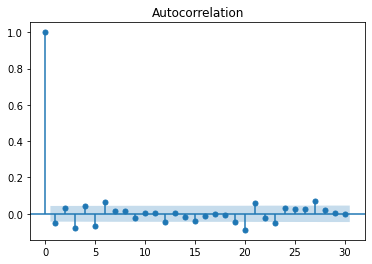

In [242]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(data_differenced.dropna(), lags=30)

In [243]:
from scipy.stats import kruskal

def seasonality_test(series):
        seasoanl = False
        idx = np.arange(len(series.index)) % 12
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

    
seasonality_test(data['ask'])

True

# Train Test Split

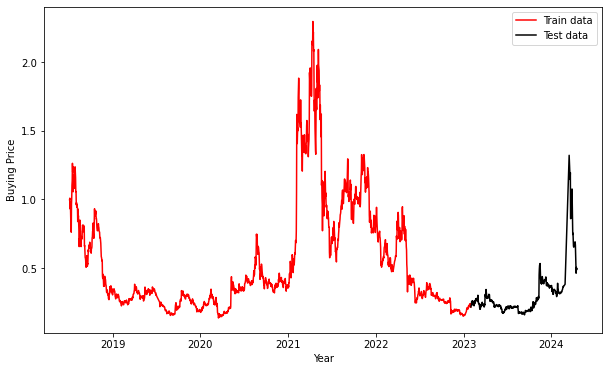

In [161]:
#split data into train and training set
data_arima = data['ask']
train_test_split_ratio = int(len(data_arima)*0.2)
train_test_split_ratio
train_data, test_data = data_arima[train_test_split_ratio:], data_arima[:train_test_split_ratio]

train_data, test_data

# train_data = data_arima[int(len(data_arima)):int(0.8*(len(data_arima)))]
# test_data = data_arima[int(0.8*(len(data_arima))):int(len(data_arima))]

# to_row = int(len(data_arima)*0.8)
# train_data = list(data_arima[0:to_row])
# test_data = list(data_arima[to_row:])

# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Buying Price')
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend()

In [162]:
print('Train', len(train_data))
print('Test', len(test_data))

test_data.index

Train 1645
Test 411


DatetimeIndex(['2024-04-16', '2024-04-15', '2024-04-14', '2024-04-13',
               '2024-04-12', '2024-04-10', '2024-04-09', '2024-04-07',
               '2024-04-06', '2024-04-05',
               ...
               '2023-02-09', '2023-02-08', '2023-02-07', '2023-02-06',
               '2023-02-05', '2023-02-04', '2023-02-03', '2023-02-02',
               '2023-02-01', '2023-01-31'],
              dtype='datetime64[ns]', name='date', length=411, freq=None)

In [163]:
data_arima.dropna(inplace=True)

# ARIMA

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no asso

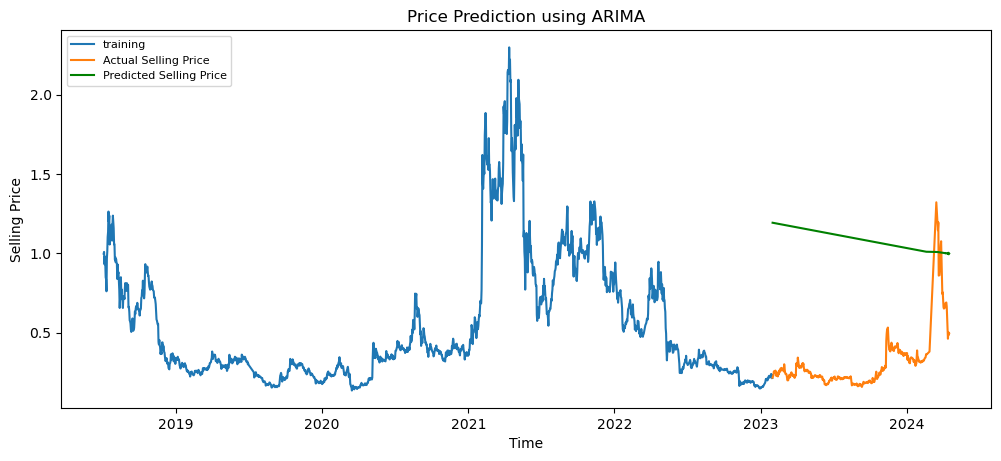

In [217]:
# ARIMA Method
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

arima_model = ARIMA(train_data, order=(4,1,3))

# Fitting the final model with the order
fitted_model = arima_model.fit()
# print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict() 

y_pred = pd.Series(fitted_model.forecast(411)[0], index = test_data.index)
y_true = test_data

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='Actual Selling Price')
plt.plot(y_pred,label='Predicted Selling Price', color = 'green')


plt.title('Price Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Selling Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Forecast for Next 30 Days using ARIMA

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it i

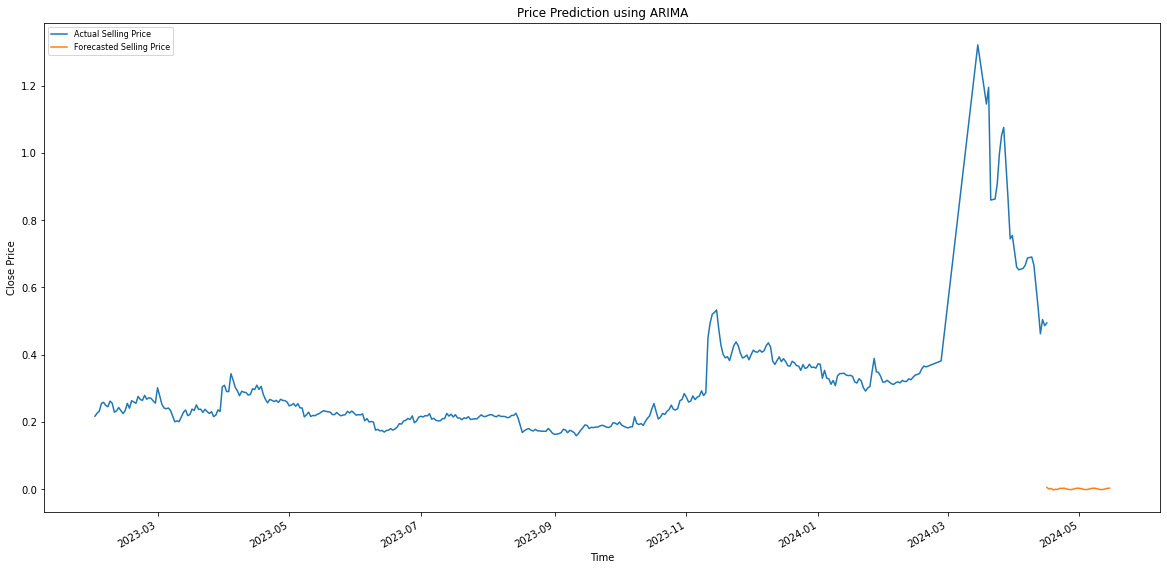

In [264]:
from datetime import datetime, timedelta


arima_model2 = ARIMA(data_arima, order=(4,1,3))
fitted_model2 = arima_model2.fit()
forecast = fitted_model2.predict(start = len(data_arima),  
                          end = (len(data_arima)-1) + 30).rename('Forecast')

dates = pd.date_range(start=data['ask'].index[0]+timedelta(days=0),end=data['ask'].index[0]+timedelta(days=29), freq='D')
forecast.index=dates
test_data.plot(figsize = (20, 10), label = 'Actual Selling Price')
forecast.plot(label= 'Forecasted Selling Price')
plt.title('Price Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)

In [219]:
# Performance Parameters
import numpy as np
mae = np.mean(np.abs(y_pred -  y_true))

import math  
import sklearn.metrics  
mse = sklearn.metrics.mean_squared_error(y_true, y_pred)  
rsme = math.sqrt(mse)  

import pprint
pprint.pprint({'Mean Absolute Error': mae, 
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse})

{'Mean Absolute Error': 0.8059376022567827,
 'Mean Squared Error': 0.6799355386129254,
 'Root Mean Squared Error': 0.0546376365347862}


# SARIMA 

In [220]:
# SARIMA Model

import statsmodels.api as sm
sarima_model = sm.tsa.statespace.SARIMAX(train_data, order=(4,1,3), seasonal_order=(4,1,3,12), seasonal=True)
result = sarima_model.fit()
print(result.summary())

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it i

                                     SARIMAX Results                                      
Dep. Variable:                                ask   No. Observations:                 1645
Model:             SARIMAX(4, 1, 3)x(4, 1, 3, 12)   Log Likelihood                2599.872
Date:                            Thu, 18 Apr 2024   AIC                          -5169.744
Time:                                    18:36:59   BIC                          -5088.780
Sample:                                         0   HQIC                         -5139.709
                                           - 1645                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1246      0.302     -3.730      0.000      -1.716      -0.534
ar.L2         -0.8905      0.339   

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


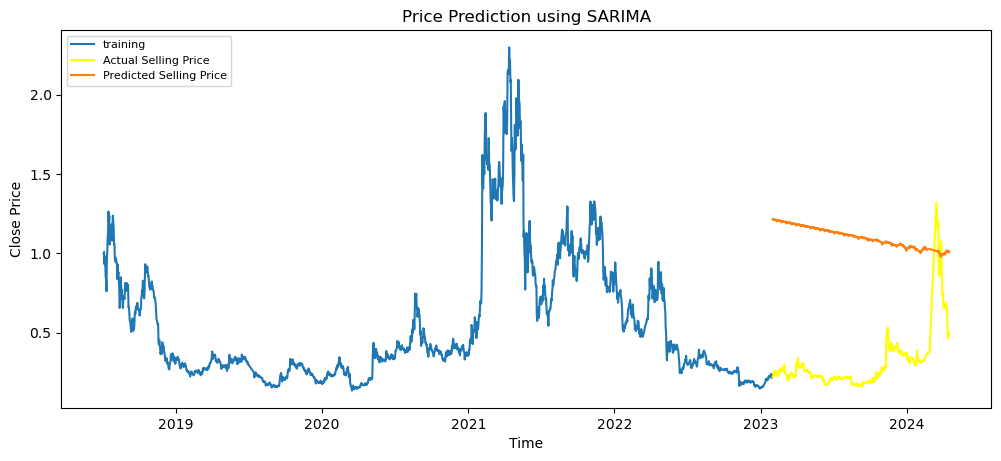

In [221]:
forecast_sarima = result.get_prediction(start=1645, end=2055,dynamic = False)
prediction_sarima = forecast_sarima.predicted_mean
prediction_sarima = prediction_sarima.set_axis(test_data.index)
prediction_sarima

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')

plt.plot(test_data, label='Actual Selling Price', color='yellow')
plt.plot(prediction_sarima,label='Predicted Selling Price')

plt.title('Price Prediction using SARIMA')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


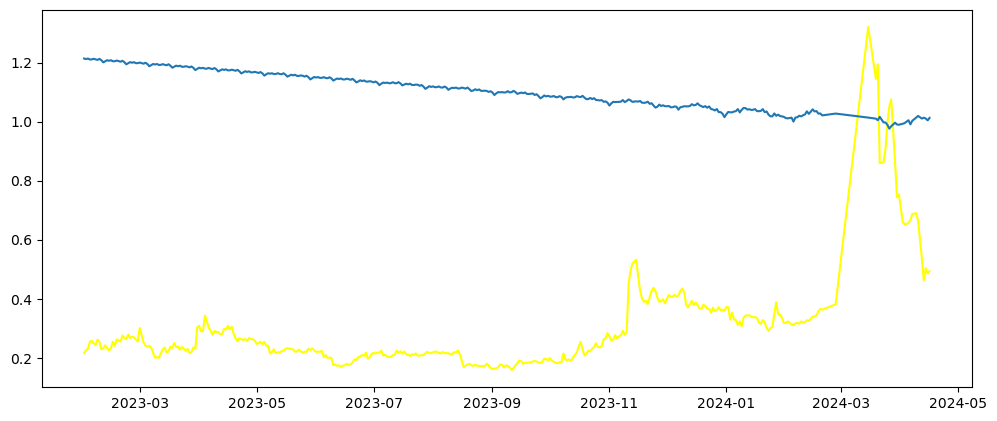

In [222]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_data, label='Actual Exchange Price', color='yellow')
plt.plot(prediction_sarima,label='Predicted Stock Price')

C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3-2021.05\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it i

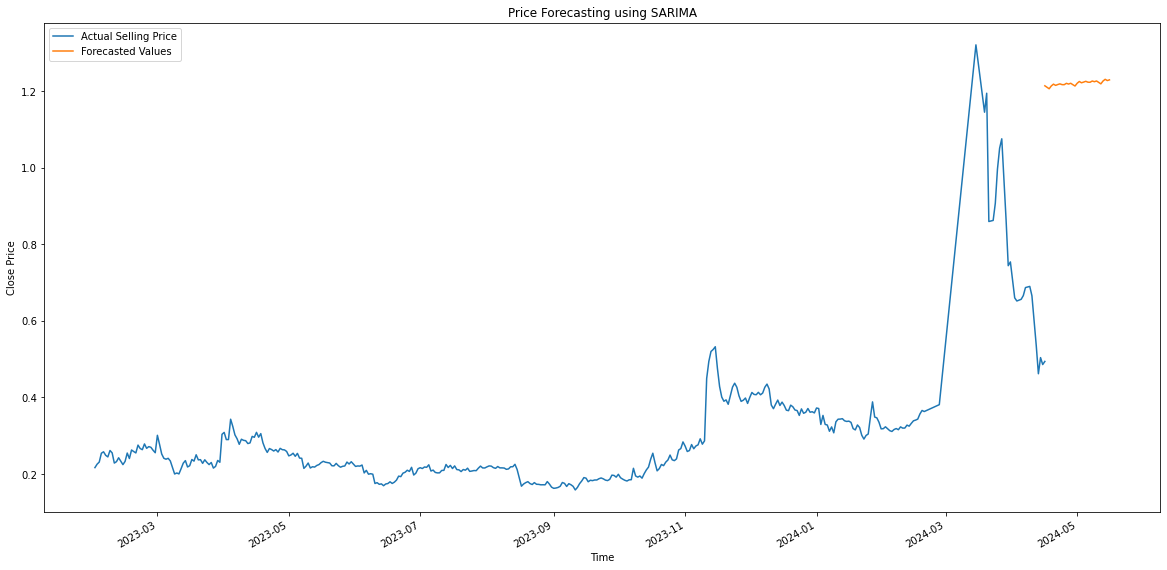

In [261]:
from datetime import datetime, timedelta

sarima_model2 = sm.tsa.statespace.SARIMAX(test_data, order=(4, 1, 3), seasonal_order=(4,1,3,30), seasonal=True)
result2 = sarima_model.fit()
forecast = result2.predict(start = len(data_bid),  
                          end = (len(data_bid)-1) + 31).rename('Forecast')

dates = pd.date_range(start=data['ask'].index[0]+timedelta(days=0),end=data['ask'].index[0]+timedelta(days=30), freq='D')

forecast.index=dates
test_data.plot(figsize = (20, 10), legend = True, label='Actual Selling Price')
forecast.plot(label='Forecasted Values')
plt.title('Price Forecasting using SARIMA')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [244]:
# Performance Parameters
import numpy as np
mae1 = np.mean(np.abs(prediction_sarima -  test_data))

import math  
import sklearn.metrics  
mse1 = sklearn.metrics.mean_squared_error(test_data, prediction_sarima)  
rsme1 = math.sqrt(mse1)  

import pprint
pprint.pprint({'Mean Absolute Error': mae1, 
              'Mean Squared Error': mse1,
              'Root Mean Squared Error': rsme1})

{'Mean Absolute Error': 0.8181863707304105,
 'Mean Squared Error': 0.701218983918231,
 'Root Mean Squared Error': 0.8373881918908523}


In [ ]:
# from datetime import datetime, timedelta
 
# start_date = datetime.today().strftime('%Y-%m-%d')
# end_date = (pd.to_datetime(start_date) + timedelta(days = 30) ).strftime('%Y-%m-%d')


# sarima_model2 = sm.tsa.statespace.SARIMAX(data_arima, order=(2,0,1), seasonal_order=(2,0,1,30), seasonal=True)
# result2 = sarima_model2.fit()
# print(result2.summary())

# forecasted_sarima = result.get_prediction(start=2056, end=2086, dynamic = False)
# prediction_sarima2 = forecasted_sarima.predicted_mean
# prediction_sarima2 = prediction_sarima2.set_axis(start_date,end_date)
# prediction_sarima2


# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(data_arima, label='training')
# plt.plot(prediction_sarima2,label='Predicted Stock Price fro next 30 days')
# # plt.plot(test_data, label='Actual Exchange Price')

# plt.title('Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Close Price')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()


In [ ]:
# forecast_sarima = result.predict(test_data, start = ,end =)
# y_pred_sarima = pd.Series(sarima_model.predict(411)[0], index = test_data.index)
# y_true_sarima = test_data
# plt.plot(train_data, label='training')
# plt.plot(y_pred_sarima,label='Predicted Stock Price')
# plt.plot(test_data, label='Actual Exchange Price')
# data[['ask','forcast_SARIMA_1']].plot(figsize=(20, 5))

In [ ]:
# one_step_predictions = []

# for i in range(48):
#     cut_point = weather.size - 24 + i
#     model = sm.tsa.statespace.SARIMAX(train_data_SARIMA['temperature'][:cut_point],
#                                  order=(2, 0, 1),
#                                  seasonal_order=(0, 1, 1, 12),
#                                  enforce_stationarity=False,
#                                  enforce_invertibility=False)
#     result = model.fit()
#     one_step_predictions.append(result.predict(cut_point).values[0])

# test_data_SARIMA['prediction'] = one_step_predictions
# test_data_SARIMA.set_index('date', inplace=True)
# test_data_SARIMA['temperature'].plot(label='Actual Average Temperature', color='orange')
# test_data_SARIMA['prediction'].plot(label='SARIMA Model Prediction', color='blue')
# plt.title("Prediction vs. Actual Temperature of Istanbul")
# plt.xlabel('Date')
# plt.ylabel('Temperature (degrees Celcius)')

# plt.legend(loc='lower right')

In [ ]:
# import datetime
# from dateutil.relativedelta import relativedelta
# start = datetime.datetime.strptime("2024-04-17", "%Y-%m-%d")
# date_list = [start + relativedelta(months=x) for x in range(0,12)]
# future_prediction = pd.DataFrame(index=date_list, columns= data.columns)
# data = pd.concat([data, future_prediction])

# data['future_prediction']=result.predict(start=5, end=100, dynamic=True)
# data[['ask','future_prediction']].plot(figsize=(10, 6))


In [ ]:
# forecast_values = fitted_model.predict(len(test_data)) 
# forecast_values
# fcv_series = pd.Series(forecast_values, index=test_data.index)
# fcv_series

In [ ]:
# ARIMA

# # Split data into train / test sets 
# train = data.iloc[:len(data)-365] 
# test = data.iloc[len(data)-365:] 

In [ ]:
# history = [x for x in train]

# predictions = list()
# model = ARIMA(history, order=(1,1,1))
# model_fit = model.fit()
# yhat = model_fit.forecast()[0]
# predictions.append(yhat)
# history.append(y[0])
# model_fit.summary()

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
# predictions = list()
# history = [x for x in train_data]

# arima_model = ARIMA(train_data, order = (1,1,2))
# model = arima_model.fit()
# print(model.summary())

# y = test
# pred = model.forecast()[0]
# predictions.append(pred)
# history.append(y[0])
# print(model.summary())

In [ ]:
# plt.figure(figsize=(16,8))
# plt.plot(df1.index[-365:], df1.tail(365), color='green', label = 'Train Stock Price')
# plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
# plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
# plt.title('Stock Price Prediction')
# plt.xlabel('date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# data['forecast'] = model_fit.predict(start=2056, end=2086, dynamic=True)
# data[['ask','forecast']].plot(figsize=(12,8))

In [ ]:
# !pip install pmdarima 
# from pmdarima import auto_arima

# stepwise_fit = auto_arima(train['ask'], start_p = 1, start_q = 1, 
#                           max_p = 2, max_q = 2, m = 365, 
#                           start_P = 0, seasonal = True, 
#                           d = None, D = 1, trace = True, 
#                           error_action ='ignore',   
#                           suppress_warnings = True,  
#                           stepwise = True)          
# # To print the summary 
# stepwise_fit.summary()

In [ ]:
# result = stepwise_fit.fit() 
# result.summary() 

In [ ]:
# data['forecast'] = model_fit.predict(start=2056, end=2086, dynamic=True)
# data[['ask','forecast']].plot(figsize=(12,8))

In [ ]:
# data_bid = data['bid'].loc[(data['bid'].notnull())]
# # data['volume'].dropna(inplace=True)
# data_bid

# from datetime import datetime, timedelta


# arima_model2 = ARIMA(data['ask'], order=(2,0,1))
# fitted_model2 = arima_model2.fit()
# forecast = fitted_model2.predict(start = len(data['ask']),  
#                           end = (len(data['ask'])-1) + 30).rename('Forecast')

# dates = pd.date_range(start=data['ask'].index[0]+timedelta(days=0),end=data['ask'].index[0]+timedelta(days=29), freq='D')
# forecast.index=dates
# test_data.plot(figsize = (20, 10), legend = True)
# forecast.plot(legend = True)
# plt.show()